test if the distribution of ages is the same for 

1) male and female riders

2) day and night riders

use 3 tests: KS, Pearson's, Spearman's. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a significant threshold for the whole eercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/home/cusp/df1676/PUIdata'

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isdir(os.getenv("PUIDATA")):
        os.system('mkdir '+ os.getenv("PUIDATA"))

    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        #os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        if int(datestring) < 201409:
            os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        #os.system("cp "+ datestring + "-citibike-tripdata.csv" + os.getenv("PUIDATA") + "/" + 
        #          datestring + "-citibike-tripdata.csv")
        if int(datestring) < 201307:
            print ("Warning: Not Avaliable")

In [4]:
datestring = raw_input("Input Year and Month (eg. 201510): ")
#datestring = '201409'
getCitiBikeCSV(datestring)

Input Year and Month (eg. 201510): 201502


In [5]:
df = pd.read_csv(datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [6]:
df.date = pd.to_datetime(df.starttime)

In [7]:
print (df.columns)
print (df.shape)

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')
(196930, 15)


In [8]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [10]:
df.head()
#df.describe()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,NaN,38.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,23.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,NaN,47.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,NaN,31.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,59.0,NaN


In [11]:
bins = np.arange(10, 99, 5)

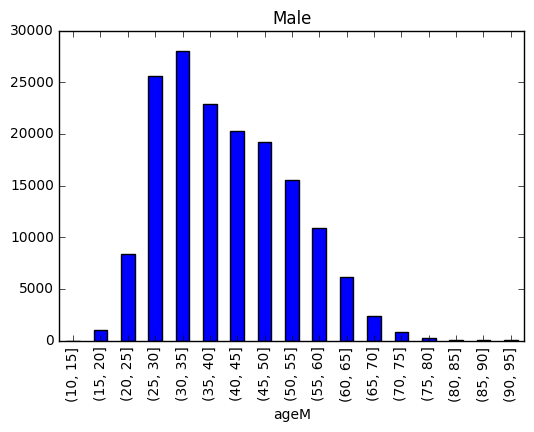

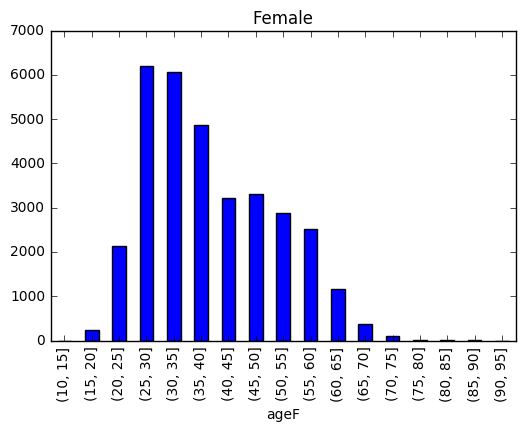

In [12]:
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
axM.plot(kind="bar", title="Male", legend=False)
axF.plot(kind='bar', title="Female", legend=False)

### Fig 1: bar plot of distribution of riders' ages by gender

**?**
<br/>
Prof's note:
<br/>"
this is how the cumulative distributions look like. Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it
"<br/>

In [13]:
bins = np.arange(10, 99, 5)
csM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

In [14]:
diff = np.abs(csM / csM.max() - csF / csF.max())

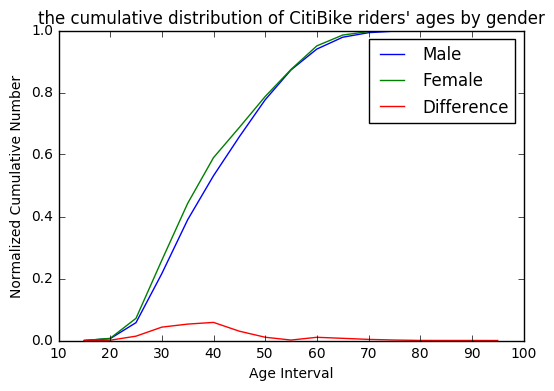

In [15]:
pl.plot(bins[:-1]+5, csM/csM.max(), label="Male")
pl.plot(bins[:-1]+5, csF/csF.max(), label="Female")
pl.plot(bins[:-1]+5, diff, label="Difference")
pl.legend()
pl.xlabel("Age Interval")
pl.ylabel("Normalized Cumulative Number")
pl.title("the cumulative distribution of CitiBike riders' ages by gender")

### Fig2 The cumulative distribution of CitiBike riders' ages by gender

In [16]:
diff.max()

count_nonzero    0.058399
dtype: float64

**?**
<br/>
They look similar! But the difference gets to 5.8%. 

<br/><br/>If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.
<br/><br/>
Notice that there may be **NaN values you are gonna have to deal with!** 
<br/>*You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)]*<br/> 
or *you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...*
lets run the scipy KS test

### KS tests to compare 2 samples
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [17]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.08478881431969218, pvalue=4.5875015783108826e-172)


**scipy.stat.ks_2samp(sample1, sample2)** return the ks statistics and p-value of two-tail test.
<br/>Suppose we set the significent level as $\alpha = 0.05$
<br/>if p-value < $\alpha$, we reject the NULL hypothesis, which is two samples are not from the same distribution. And choose the alternative hypothesis, which is two samples are from the same distribution. 

### Link: Theroy of K-S Test

### Now redo the test with a subsample of the data: take only 1 ride every of 200


In [18]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

In [104]:
df_sub.shape

(985, 17)

In [19]:
index = np.arange(0,df.shape[0],200)
df_sub = df.iloc[index,:]
df_sub.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,NaN,38.0
200,241,2/1/2015 3:57,2/1/2015 4:01,252,MacDougal St & Washington Sq,40.732264,-73.998522,128,MacDougal St & Prince St,40.727103,-74.002971,15290,Subscriber,1982.0,1,34.0,NaN
400,573,2/1/2015 8:42,2/1/2015 8:51,150,E 2 St & Avenue C,40.720874,-73.980858,285,Broadway & E 14 St,40.734546,-73.990741,14947,Subscriber,1981.0,2,NaN,35.0
600,390,2/1/2015 9:40,2/1/2015 9:47,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,323,Lawrence St & Willoughby St,40.692362,-73.986317,17519,Subscriber,1985.0,2,NaN,31.0
800,197,2/1/2015 10:19,2/1/2015 10:22,291,Madison St & Montgomery St,40.713126,-73.984844,332,Cherry St,40.712199,-73.979481,15719,Subscriber,1973.0,1,43.0,NaN


In [20]:
bins = np.arange(10, 99, 5)

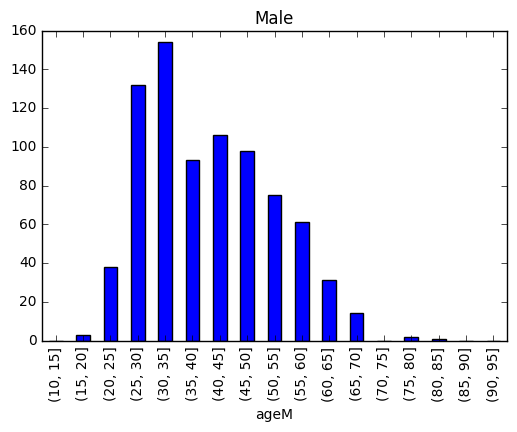

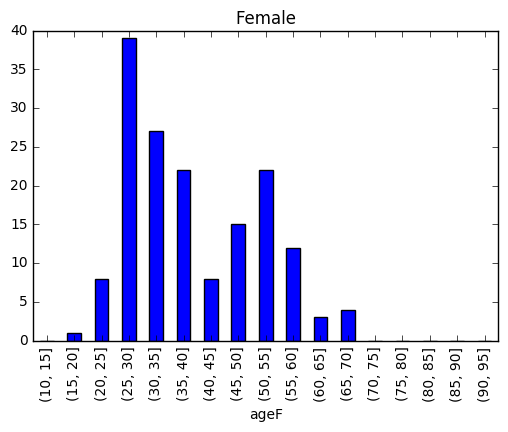

In [21]:
subM = df_sub['ageM'].groupby(pd.cut(df_sub['ageM'], bins)).agg([count_nonzero])
subF = df_sub.ageF.groupby(pd.cut(df_sub['ageF'], bins)).agg([count_nonzero])
subM.plot(kind = "bar", title="Male", legend=False)
subF.plot(kind = 'bar', title='Female', legend=False)

### Fig 3: the distribution of rider's age by gender (subset)

In [23]:
subM_cs = df_sub.ageM.groupby(pd.cut(df_sub.ageM, bins)).agg([count_nonzero]).cumsum()
subF_cs = df_sub.ageF.groupby(pd.cut(df_sub.ageF, bins)).agg([count_nonzero]).cumsum()

In [24]:
subM_cs_normalized = subM_cs/subM_cs.max()
subF_cs_normalized = subF_cs/subF_cs.max()

In [27]:
diff_sub = np.abs(subF_cs_normalized - subM_cs_normalized)
#diff

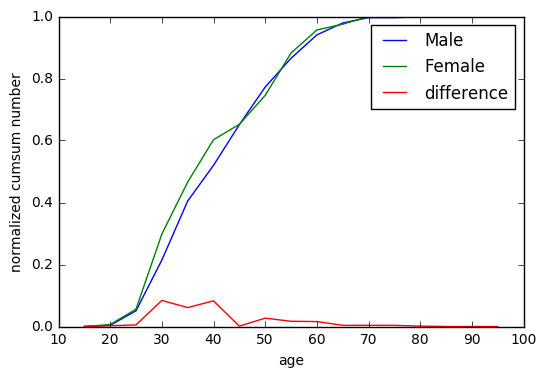

In [29]:
pl.plot(bins[:-1]+5, subM_cs_normalized, label="Male")
pl.plot(bins[:-1]+5, subF_cs_normalized, label="Female")
pl.plot(bins[:-1]+5, diff_sub, label="difference")
pl.xlabel('age')
pl.ylabel('normalized cumsum number')
pl.legend()

### Fig 4: The cumulative distribution of CitiBike riders' ages by gender (subset)

In [31]:
diff_sub.max()

count_nonzero    0.084028
dtype: float64

##  K-S Test for Subset 

In [32]:
ks_sub = scipy.stats.ks_2samp(df_sub.ageM[~np.isnan(df_sub.ageM)], df_sub.ageF[~np.isnan(df_sub.ageF)])
print (ks_sub)

Ks_2sampResult(statistic=0.1168300716320274, pvalue=0.047131100671457538)


The ks_2samp return the k-s statistics and p-value.
<br/>
since, p-value < 0.05, we can say under the significant level 0.05, reject the null hypothesis and choose the alternative hypothesis which is two samples are from the same distribution.

<br/><br/>

## Pearson's test for correlation & Spearman's Correlation 

notice that the Pearson's is a pairwise test: the samples need to be
<br/>a. sorted and
<br/>b. the same size!
<br/><br/> All Data

Since Pearson's and Spearman's correlation test need samples with same size, and the subsets (female and male) have different number of rows. Here we randomly selesct *235911* rows of Male subset, and calculate the correlation between this new subset and Female subset. 

<br/><br/><br/><br/>

In [70]:
np.random.seed(1111)
listM = list(df.ageM[~np.isnan(df.ageM)])
listF = list(df.ageF[~np.isnan(df.ageF)])
print ( len(listF), len(listM) )
listIndex = np.random.choice(range(0, len(listM)), len(listF), replace=False)
listM_adj = [ listM[i] for i in listIndex ]
len(listM_adj) == len(listF)

33064 161561


In [ ]:
listF_sort = sort(listF)
listM_sort = sort(listM_adj)

In [106]:
scipy.stats.pearsonr(listF_sort, listM_sort)

(0.99528182039496704, 0.0)

In [107]:
scipy.stats.spearmanr(listF_sort, listM_sort)

SpearmanrResult(correlation=0.99918287802508943, pvalue=0.0)

Null hypothesis in both tests (Pearson's and Spearman's) is there's no relationship between the number of female riders and the number of male rider by age. Each test shows the the value of correlation statistics and p-value. Since p < 0.05, we can say under the statistical significant level 0.05, the number of female riders and the number of male rider by age have relationship.

<br/>
<br/>
<br/>
<br/>

In [110]:
max_age = max( df.ageF.max(), df.ageM.max())

In [115]:
bins = np.arange(10, max_age+5, 5)

In [119]:
num_M = df.ageM[~np.isnan(df.ageM)].groupby(pd.cut(df.ageM[~np.isnan(df.ageM)], bins)).agg([count_nonzero])
num_F = df.ageF[~np.isnan(df.ageF)].groupby(pd.cut(df.ageF[~np.isnan(df.ageF)], bins)).agg([count_nonzero])

In [122]:
scipy.stats.pearsonr(np.array(num_F), np.array(num_M))

(array([ 0.98493885]), array([  1.01867609e-16]))

In [123]:
scipy.stats.spearmanr(np.array(num_F), np.array(num_M))

SpearmanrResult(correlation=0.9809040681109662, pvalue=1.0755785118994858e-15)

Null hypothesis in both tests (Pearson's and Spearman's) is there's no relationship between the number of female riders and the number of male rider by age. Each test shows the the value of correlation statistics and p-value. Since p < 0.05, we can say under the statistical significant level 0.05, the number of female riders and the number of male rider by age have relationship.

# Extra Credit

CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES OF RIDERS DURING THE DAY VS DURING THE NIGHT!

####  Day : 6am -> 6pm
####  Night : 6pm -> 6am

In [189]:
df2 = df.loc[:, ('starttime', 'birth year', 'usertype')]
df2['date'] = pd.to_datetime(df2.starttime)
df2['age'] = 2016 - df['birth year']
df2.head()

,starttime,birth year,usertype,date,age
0,2/1/2015 0:00,1978.0,Subscriber,2015-02-01 00:00:00,38.0
1,2/1/2015 0:00,1993.0,Subscriber,2015-02-01 00:00:00,23.0
2,2/1/2015 0:01,1969.0,Subscriber,2015-02-01 00:01:00,47.0
3,2/1/2015 0:01,1985.0,Subscriber,2015-02-01 00:01:00,31.0
4,2/1/2015 0:01,1957.0,Subscriber,2015-02-01 00:01:00,59.0


Day:0 
<br/>
Night:1

In [208]:
Day_or_Night = lambda x: 1 if (int(x[-5:-3]) >= 18 or int(x[-5:-3]) <6) else 0
df2["Day_or_Night"] = df2["starttime"].apply(Day_or_Night)

In [206]:
df2.head()

,starttime,birth year,usertype,date,age,Day_or_Night
0,2/1/2015 0:00,1978.0,Subscriber,2015-02-01 00:00:00,38.0,1
1,2/1/2015 0:00,1993.0,Subscriber,2015-02-01 00:00:00,23.0,1
2,2/1/2015 0:01,1969.0,Subscriber,2015-02-01 00:01:00,47.0,1
3,2/1/2015 0:01,1985.0,Subscriber,2015-02-01 00:01:00,31.0,1
4,2/1/2015 0:01,1957.0,Subscriber,2015-02-01 00:01:00,59.0,1


In [210]:
df2['ageD'] = 2016 - df2['birth year'][(df2['usertype'] == 'Subscriber') & (df2['Day_or_Night'] == 0)]
df2['ageN'] = 2016 - df2['birth year'][(df2['usertype'] == 'Subscriber') & (df2['Day_or_Night'] == 1)]

In [214]:
age_day = df2.ageD[~ np.isnan(df2.ageD)]
age_night = df2.ageN[~ np.isnan(df2.ageN)]

In [220]:
max_age = max( df2.ageD.max(), df2.ageN.max())
bins = np.arange(10, max_age+5, 5)

In [222]:
groupby_day = age_day.groupby(pd.cut(age_day, bins)).agg([count_nonzero])
groupby_night = age_night.groupby(pd.cut(age_night, bins)).agg([count_nonzero])

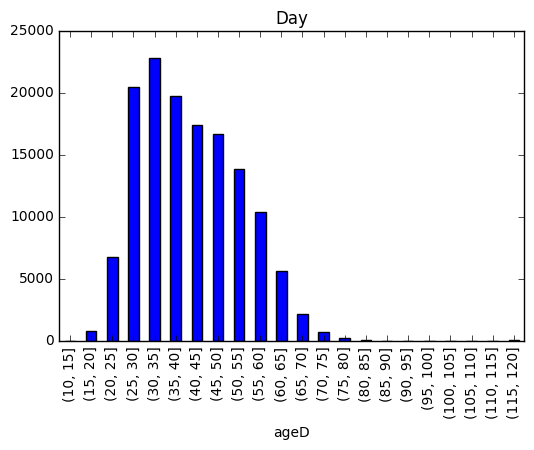

In [228]:
groupby_day.plot(kind='bar', legend=False, title="Day")

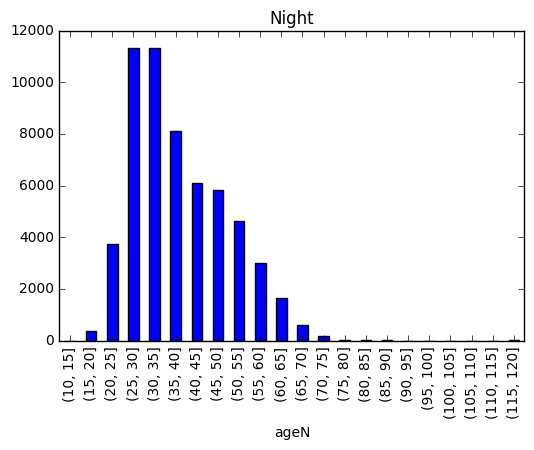

In [229]:
groupby_night.plot(kind="bar",legend=False,title="Night")

In [234]:
groupby_day_cs = groupby_day.cumsum()
groupby_night_cs = groupby_night.cumsum()
diff = np.abs(groupby_day_cs/groupby_day_cs.max()-groupby_night_cs/groupby_night_cs.max())

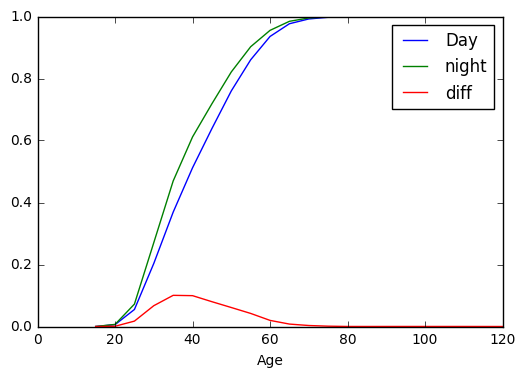

In [240]:
pl.plot(bins[:-1]+5, groupby_day_cs/groupby_day_cs.max(),label="Day")
pl.plot(bins[:-1]+5, groupby_night_cs/groupby_night_cs.max(),label ="night")
pl.plot(bins[:-1]+5, diff,label="diff")
pl.legend()
pl.xlabel("Age")

In [241]:
scipy.stats.ks_2samp(age_day, age_night)

Ks_2sampResult(statistic=0.1203053607471053, pvalue=0.0)

null hypothesis in this test is riders' age has no relationship with Day or Night.
p-value in K-S Test is lower than 0.05, thus we reject null hypothesis. 

<br/>

Test:

In [251]:
for i in [10,100,1000,5000,10000,200000]:
    print (scipy.stats.ks_2samp(age_day[0:i], age_night[0:i]))

Ks_2sampResult(statistic=0.2, pvalue=0.97478924654099519)
Ks_2sampResult(statistic=0.2700000000000001, pvalue=0.0010291327972217141)
Ks_2sampResult(statistic=0.10700000000000008, pvalue=1.8753479262928051e-05)
Ks_2sampResult(statistic=0.042399999999999854, pvalue=0.00023885741711507092)
Ks_2sampResult(statistic=0.0673000000000009, pvalue=3.6549890782170241e-20)
Ks_2sampResult(statistic=0.1203053607471053, pvalue=0.0)


<br/>


## Quick Test for Pearson's Correlation and Spearman's Correlation 

In [124]:
scipy.stats.ks_2samp([1,2,3,4,5],[1,4,9,10,20])

Ks_2sampResult(statistic=0.6000000000000001, pvalue=0.2089848305751669)

In [92]:
scipy.stats.pearsonr([1,2,3,4,5],[1,4,9,10,20])

(0.95833505211187064, 0.010145118688005789)

In [93]:
scipy.stats.spearmanr([1,2,3,4,5],[1,4,9,10,20])

SpearmanrResult(correlation=0.99999999999999989, pvalue=1.4042654220543672e-24)

Corr=0.999 means x and y have a strong correlation. And p-value < 0.05 means under the significent level 0.05, we can reject the Null hypothesis which is the corr=0. Thus we can choose the alternative hhypothesis that is x and y has a statistical significent strong relationship.